In [177]:
# Neural Networks Regression Example 🤖📈

# ------------------------
# STEP 1: IMPORT LIBRARIES
# ------------------------

import numpy as np  # 📊 NumPy is used for numerical operations (arrays, math, etc.)
import matplotlib.pyplot as plt  # 📈 Used to create plots and graphs
from sklearn.datasets import make_regression  # 🧪 Used to generate fake regression data
from sklearn.model_selection import train_test_split  # 🔀 Used to split data into train/test sets
from sklearn.metrics import mean_squared_error, r2_score  # 🧮 Used to evaluate regression performance
from neural_networks import NeuralNetworkModel  # 🧠 Custom-built neural network model wrapper (assumed to be defined elsewhere)


In [178]:

# ------------------------
# STEP 2: GENERATE SYNTHETIC DATA
# ------------------------

# Generate 200 data points, each with 5 features, plus some noise to simulate real-world imperfections.
# This gives us a fake dataset for regression.
X, y = make_regression(
    n_samples=200,       # 🧍 200 samples (rows)
    n_features=5,        # 📐 5 input features per sample
    noise=20,            # 🎯 Adds randomness to make data less perfect
    random_state=42      # 🔒 Ensures we get the same data every time (reproducibility)
)

# `X`: a 2D array of shape (200, 5) – input features
# `y`: a 1D array of shape (200,) – target values (regression outputs)


In [179]:

# ------------------------
# STEP 3: SPLIT INTO TRAIN/TEST
# ------------------------

# Split the data into:
# - Training set (80%): used to train the model
# - Test set (20%): used to evaluate how well the model generalizes to new data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,                 # Full dataset
    test_size=0.2,        # 20% of data goes to test set
    random_state=42       # 🔒 Consistent splitting every time
)

# After this:
# - `X_train`, `y_train`: used for training the model
# - `X_test`, `y_test`: held back for evaluation


In [180]:

# ------------------------
# STEP 4: CREATE NEURAL NETWORK MODEL
# ------------------------

# Create a neural network regression model.
# We assume `NeuralNetworkModel` is a custom wrapper around something like sklearn’s MLPRegressor.
reg_model = NeuralNetworkModel(
    task='regression',           # 📌 Specifies that we want a regression task (not classification)
    hidden_layer_sizes=(5,2),   # 🧠 2 hidden layers with 5 neurons 
    max_iter=2000                # ⏳ Max number of training iterations (epochs)
)


In [181]:
# This initializes the model but does NOT train it yet.

# ------------------------
# STEP 5: TRAIN THE MODEL
# ------------------------

# Train the neural network on the training data
# The model will use backpropagation to minimize error and learn the relationships between X and y
reg_model.train(X_train, y_train)


c:\Users\Logan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [182]:

# ------------------------
# STEP 6: MAKE PREDICTIONS
# ------------------------

# Now that the model is trained, we use it to predict target values for the test set
y_pred = reg_model.predict(X_test)

# `y_pred`: the model’s predicted values for the test input data


In [183]:
# ------------------------
# STEP 7: EVALUATE THE MODEL
# ------------------------

# Mean Squared Error (MSE): Average squared difference between actual and predicted values.
# Lower is better. Zero means perfect predictions.
mse = mean_squared_error(y_test, y_pred)

# R² Score (Coefficient of Determination): Tells how well the predictions explain the actual values.
# 1.0 = perfect, 0 = no better than average, negative = worse than average.
r2 = r2_score(y_test, y_pred)

# Print out performance metrics for easy viewing 📊
print(f"🧮 Mean Squared Error: {mse:.2f}")
print(f"✅ R² Score: {r2:.2f}")


🧮 Mean Squared Error: 612.47
✅ R² Score: 0.93


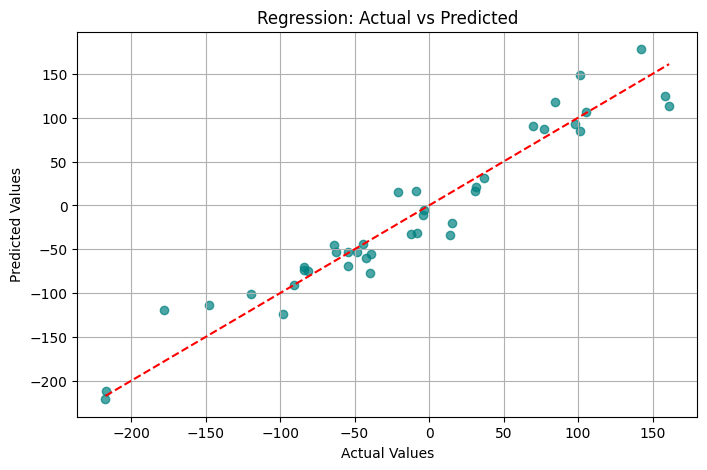

In [184]:
# ------------------------
# STEP 8: VISUALIZE RESULTS
# ------------------------

# Create a scatter plot of actual vs predicted values
# Ideal result: all points lie perfectly on the diagonal red dashed line
plt.figure(figsize=(8, 5))  # Set the figure size for better readability
plt.scatter(y_test, y_pred, color='teal', alpha=0.7)  # Plot each prediction vs actual value
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal reference line
plt.xlabel('Actual Values')       # X-axis label
plt.ylabel('Predicted Values')    # Y-axis label
plt.title('Regression: Actual vs Predicted')  # Chart title
plt.grid(True)  # Add gridlines for clarity
plt.show()  # Display the plot
